In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
from matplotlib import pyplot as plt

In [20]:
carsdata= pd.read_csv('CarPrice_Assignment.csv')
carsdata.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
carsdata.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [21]:
carsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [22]:
CompanyName= carsdata['CarName'].apply(lambda x : x.split(' ')[0])
carsdata.insert(3,'CompanyName',CompanyName)
carsdata.head()

,car_ID,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [23]:
carsdata.drop(['CarName'],axis=1,inplace=True)

In [24]:
carsdata.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
carsdata.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [27]:
carsdata.CompanyName= carsdata.CompanyName.str.lower()

In [29]:
def replace_names (a,b):
    carsdata.CompanyName.replace(a,b,inplace=True)
    
replace_names('maxda','mazda')
replace_names('porcshce','porsche')
replace_names('toyouta','toyota')
replace_names('vokswagen','volkswagen')
replace_names('vw','volkswagen')

In [30]:
carsdata.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [31]:
carsdata.loc[carsdata.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [33]:
carsdata.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

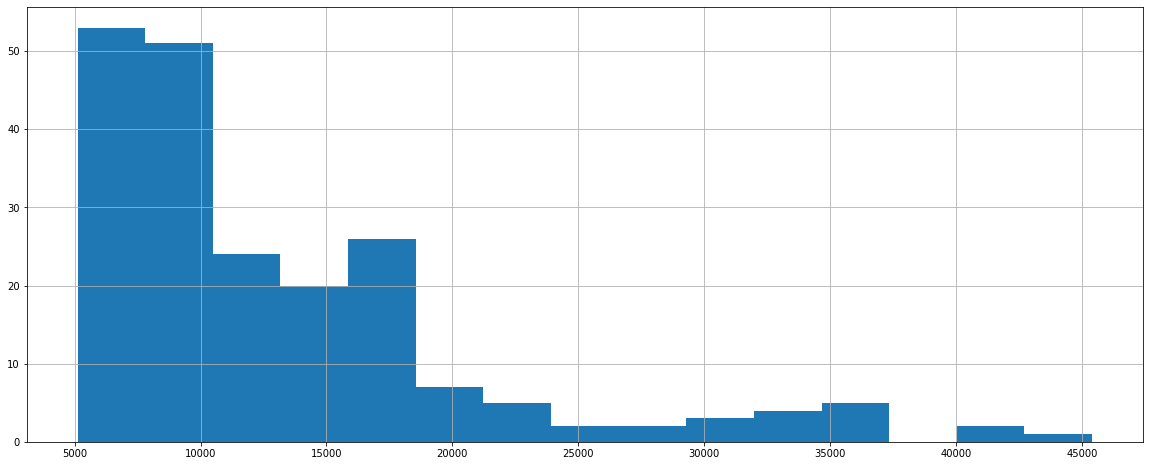

In [40]:
%matplotlib inline
carsdata.price.hist(bins=15, figsize=(20,8))
plt.show()

In [39]:
carsdata.price.describe()
carsdata.price.describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.9,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
80%      17493.800000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

In [41]:
#Inference about the dependent variable(y):
#The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
#There is a significant difference between the mean and the median of the price distribution.
#The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

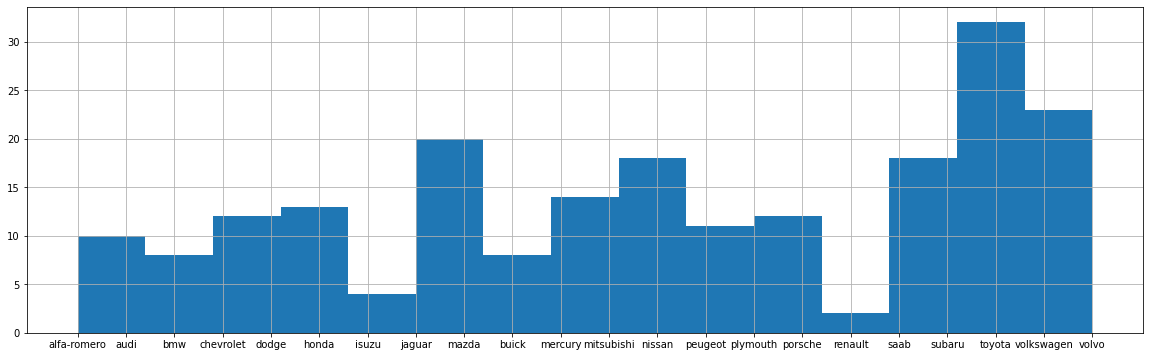

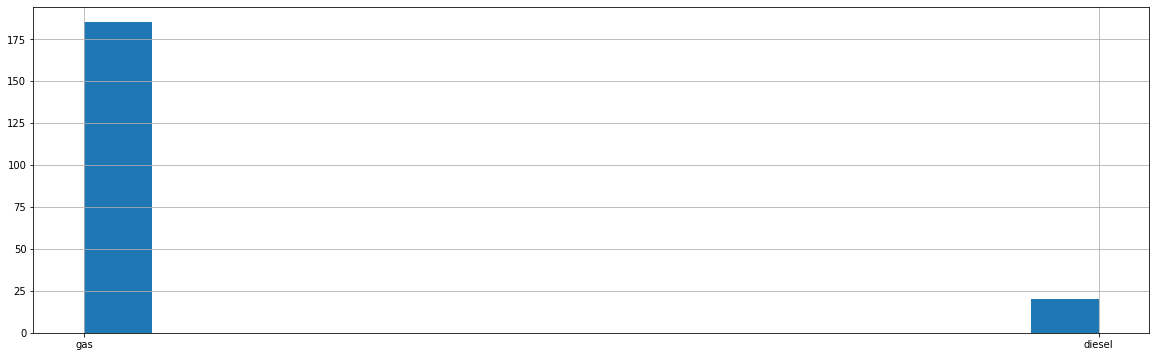

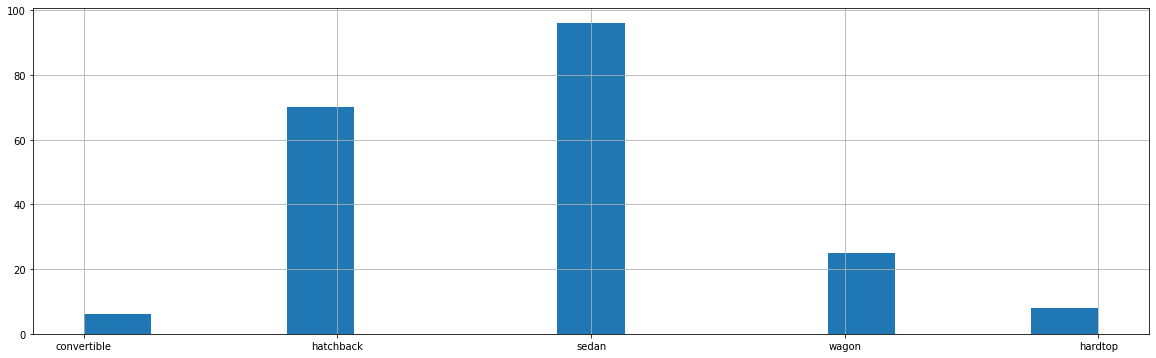

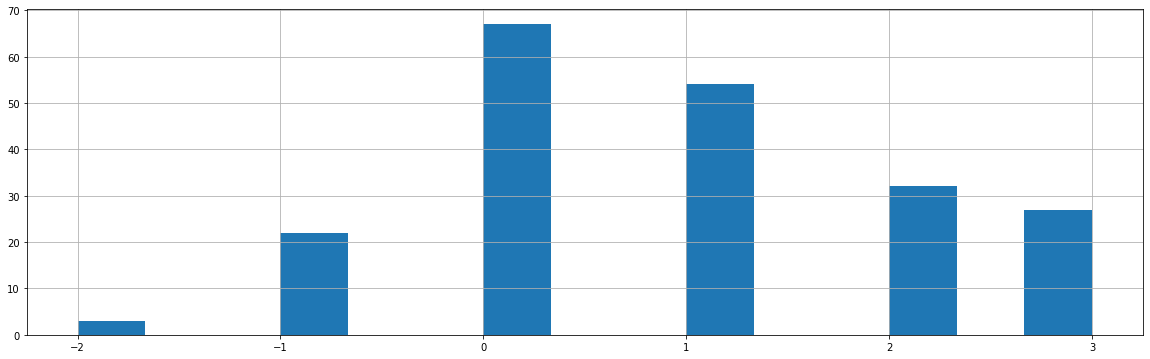

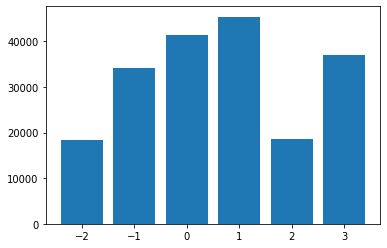

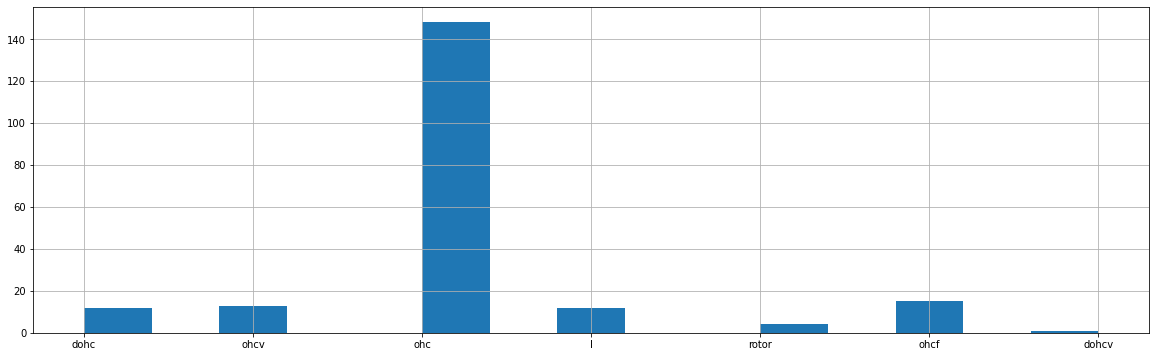

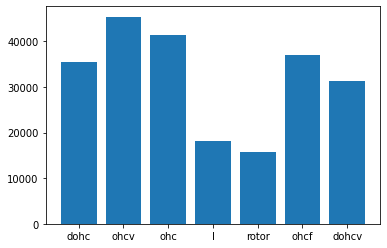

In [59]:
%matplotlib inline
carsdata.CompanyName.hist(bins=15, figsize=(20,6))
plt.show()
#plt.bar(carsdata.CompanyName, carsdata.CompanyName.value_counts())
carsdata.fueltype.hist(bins=15, figsize=(20,6))
plt.show()
carsdata.carbody.hist(bins=15, figsize=(20,6))
plt.show()
carsdata.symboling.hist(bins=15, figsize=(20,6))
plt.show()
plt.bar(carsdata.symboling,carsdata.price)
plt.show()
carsdata.enginetype.hist(bins=15, figsize=(20,6))
plt.show()
plt.bar(carsdata.enginetype,carsdata.price)
plt.show()


<AxesSubplot:xlabel='carbody'>

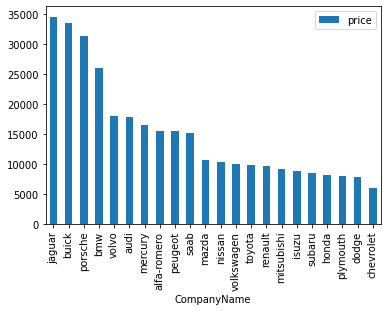

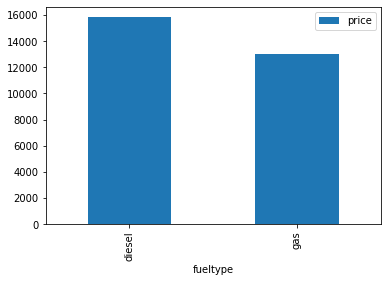

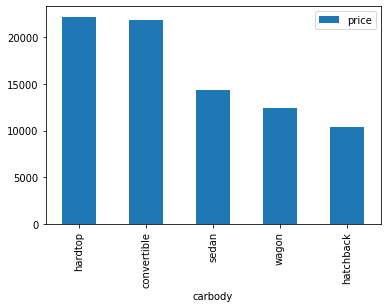

In [65]:
df=pd.DataFrame(carsdata.groupby(['CompanyName'])['price'].mean().sort_values(ascending=False))
df
df.plot.bar()

df1=pd.DataFrame(carsdata.groupby(['fueltype'])['price'].mean().sort_values(ascending=False))
df1
df1.plot.bar()

df2=pd.DataFrame(carsdata.groupby(['carbody'])['price'].mean().sort_values(ascending=False))
df2
df2.plot.bar()

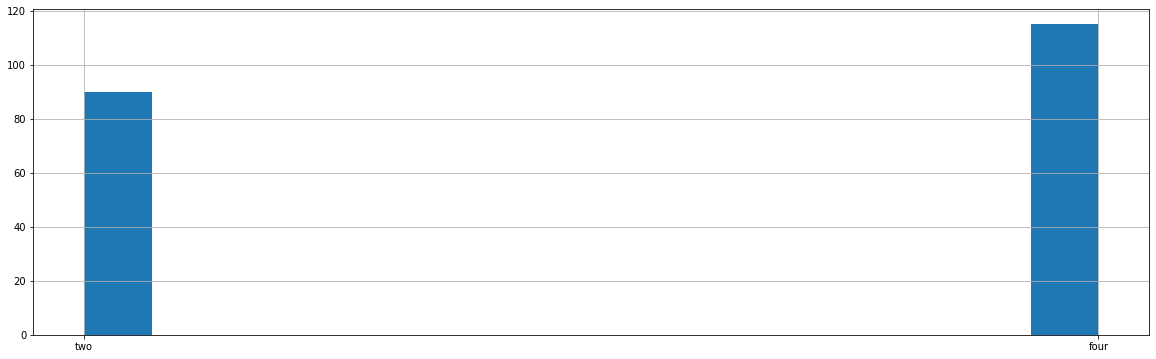

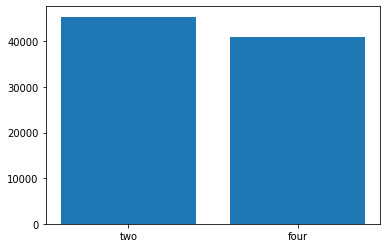

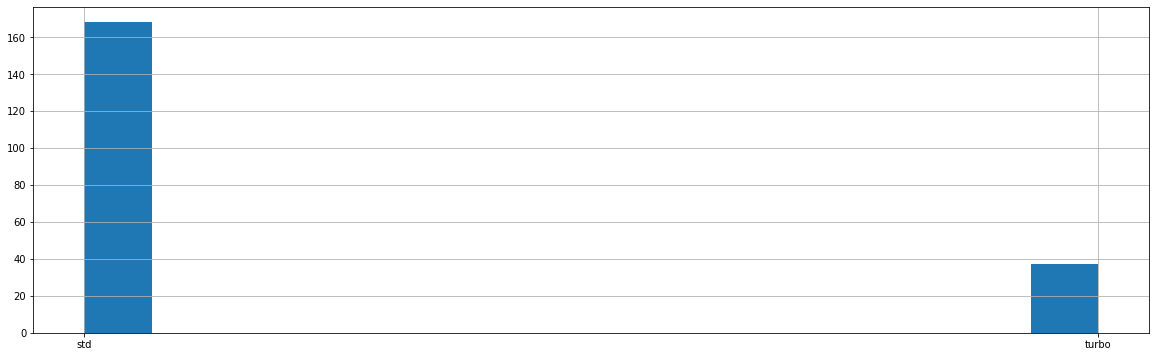

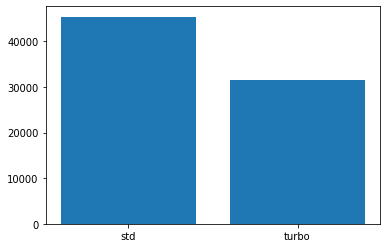

In [67]:
carsdata.doornumber.hist(bins=15, figsize=(20,6))
plt.show()
plt.bar(carsdata.doornumber,carsdata.price)
plt.show()
carsdata.aspiration.hist(bins=15, figsize=(20,6))
plt.show()
plt.bar(carsdata.aspiration,carsdata.price)
plt.show()

In [69]:
#inference: doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.

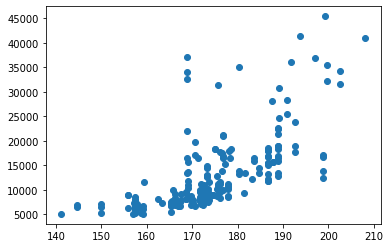

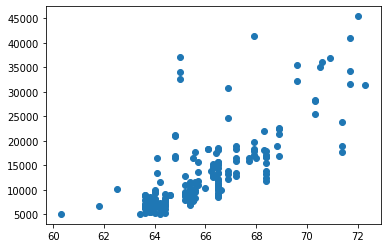

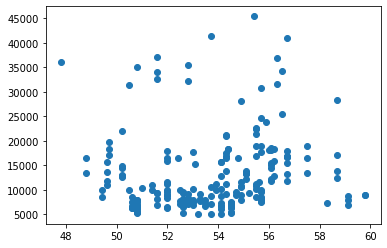

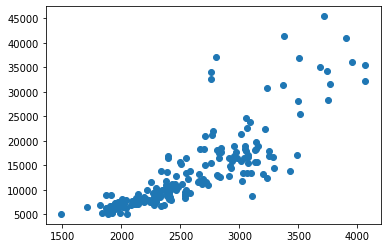

In [77]:
#visualiing numerical attributes

#carsdata.carlength.hist(bins=15, figsize=(20,6))
plt.scatter(carsdata['carlength'],carsdata['price'])
plt.show()
plt.scatter(carsdata['carwidth'],carsdata['price'])
plt.show()
plt.scatter(carsdata['carheight'],carsdata['price'])
plt.show()
plt.scatter(carsdata['curbweight'],carsdata['price'])
plt.show()

In [79]:
carsdata['fueleconomy']=(0.55 * carsdata['citympg']) + (0.45 * carsdata['highwaympg'])

In [87]:
#Binning the Car Companies based on avg prices of each Company.

carsdata['price']=carsdata['price'].astype(int)
temp=carsdata.copy()
t1=temp.groupby(['CompanyName'])['price'].mean()
t1
temp=pd.merge(temp,t1, how='left',on='CompanyName')
temp.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_x,fueleconomy,price_y
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,15498.333333
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,15498.333333
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,15498.333333
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,17859.142857
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,17859.142857


In [95]:
bins=[0,10000,20000,400000]
cars_bin=['Budget','Medium','Highend']
carsdata['carsrange']=pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
carsdata.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


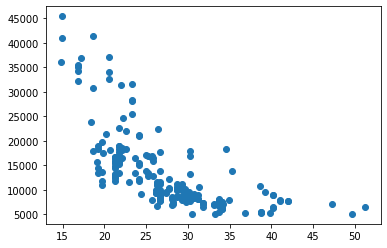

In [100]:
plt.scatter(x=carsdata['fueleconomy'],y=carsdata['price'])
plt.show()

In [102]:
cars_lr = carsdata[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


In [107]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

KeyError: 'fueltype'

In [111]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [114]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(cars_lr, train_size=0.7,test_size=0.3,random_state=100)

In [116]:
from sklearn.preprocessing import MinMaxScaler

In [118]:
scaler=MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

<ipython-input-118-549b133a7234>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [120]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,...,0,0,0,1,0,0,0,0,1,0


In [121]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.909091,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


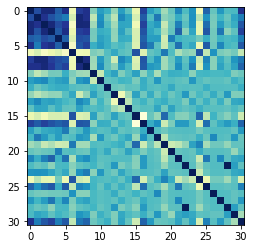

In [124]:
plt.imshow( df_train.corr() , cmap = 'YlGnBu')
plt.show()

In [127]:
df_train.corr()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
price,1.000000,0.622592,0.861861,0.867915,0.533591,0.806182,-0.685320,0.713750,0.799380,-0.191150,...,0.339469,-0.000792,0.271430,-0.695256,0.500614,-0.085273,0.247489,-0.000792,0.013065,0.792077
wheelbase,0.622592,1.000000,0.792815,0.588600,0.482386,0.382758,-0.510040,0.877909,0.796888,-0.393481,...,0.108535,-0.092032,0.288842,-0.367809,0.283534,-0.142992,0.049113,-0.092032,0.160049,0.377904
curbweight,0.861861,0.792815,1.000000,0.865102,0.625759,0.759759,-0.765596,0.881495,0.873884,-0.288561,...,0.370775,-0.040089,0.273471,-0.593859,0.455979,-0.162583,0.218088,-0.040089,0.103822,0.560543
enginesize,0.867915,0.588600,0.865102,1.000000,0.545157,0.817916,-0.640374,0.702794,0.754925,-0.145095,...,0.506634,-0.217946,0.162473,-0.613032,0.561996,-0.131452,0.413197,-0.217946,-0.061760,0.688315
boreratio,0.533591,0.482386,0.625759,0.545157,1.000000,0.518307,-0.541146,0.620436,0.580962,-0.153727,...,0.074544,0.014733,-0.000743,-0.138491,0.110833,-0.128229,0.075047,0.014733,0.062408,0.375838
horsepower,0.806182,0.382758,0.759759,0.817916,0.518307,1.000000,-0.771285,0.564588,0.685051,0.100280,...,0.437226,0.029774,0.138966,-0.663004,0.535827,-0.115652,0.338032,0.029774,-0.008108,0.554372
fueleconomy,-0.685320,-0.510040,-0.765596,-0.640374,-0.541146,-0.771285,1.000000,-0.692671,-0.669998,-0.172617,...,-0.329844,-0.208336,-0.252262,0.573745,-0.400490,0.271328,-0.162225,-0.208336,-0.142182,-0.396614
carlength,0.713750,0.877909,0.881495,0.702794,0.620436,0.564588,-0.692671,1.000000,0.846307,-0.275886,...,0.211595,-0.059682,0.278343,-0.438027,0.355099,-0.216024,0.122216,-0.059682,0.260368,0.402420
carwidth,0.799380,0.796888,0.873884,0.754925,0.580962,0.685051,-0.669998,0.846307,1.000000,-0.293054,...,0.305924,-0.010753,0.392058,-0.540779,0.271178,-0.210698,0.181043,-0.010753,0.175420,0.496702
gas,-0.191150,-0.393481,-0.288561,-0.145095,-0.153727,0.100280,-0.172617,-0.275886,-0.293054,1.000000,...,0.081954,0.053644,-0.218543,0.035346,0.052120,0.026537,0.026537,0.053644,-0.179678,-0.109323


In [128]:
y_train=df_train.pop('price')
x_train=df_train

In [179]:
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [138]:
reg=LinearRegression()
reg.fit(x_train,y_train)
reg.coef_
reg.intercept_  
reg.score(x_train,y_train)

0.9492080355670313

In [156]:
rfe=RFE(estimator=reg,n_features_to_select=10)

In [157]:
rfe=rfe.fit(x_train,y_train)

In [158]:
rfe.support_

array([False,  True, False, False,  True,  True, False,  True, False,
       False, False,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True])

In [159]:
rfe.ranking_

array([ 3,  1, 13, 10,  1,  1, 11,  1, 17, 18,  2,  1,  1,  1, 16, 15,  1,
       19,  7,  8,  9, 21,  6,  4,  5, 14,  1, 20, 12,  1])

In [160]:
rfe.n_features_

10

In [170]:
#putting in a dataframe to check which 10 features got selected via RFE
pd.DataFrame(rfe.support_,index=x_train.columns,columns=['Rank'])

pd.DataFrame(rfe.ranking_,index=x_train.columns,columns=['Rank']).sort_values(by = 'Rank' , ascending=False).head(10)

,Rank
rotor,21
two,20
l,19
turbo,18
gas,17
fwd,16
rwd,15
three,14
enginesize,13
Medium,12


In [172]:
x_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

In [176]:
x_train_rfe=x_train[x_train.columns[rfe.support_]]
x_train_rfe.head()

,curbweight,horsepower,fueleconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.213992,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.344307,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.122085,0.575000,0,0,1,0,0,0


In [187]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [181]:
x_train_new=build_model(x_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           1.29e-70
Time:                        22:25:27   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0947      0.042     -2.243      

In [184]:
x_train_new=x_train_rfe.drop(['twelve','fueleconomy'],axis=1)

In [185]:
x_train_new= build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           7.85e-72
Time:                        22:29:02   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [189]:
checkVIF(x_train_new)

,Features,VIF
0,const,26.90
1,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,wagon,3.58
8,Highend,1.63
7,dohcv,1.46


In [191]:
x_train_new.shape

(143, 9)